# Somme de deux variables gaussiennes

- Create the `Normal` distribution $X$ with parameters $\mu=-5,\sigma=3$
- Create the `Normal` distribution $Y$ with parameters $\mu=5,\sigma=3$
- Create the multivariate `Distribution` with marginals $X$ and $Y$ and independent copula
- Create the `RandomVector` input random vector `inRV` defined with the distribution
- Define the symbolic function `f` such that 
$$
f(x,y)=x+y
$$
- Create the `RandomVector` output random vector `outRV` as composition of `f` and `inRV`
- Create three sample with sizes `N=100,1000,10000` of the output random vector `outRV`.
- For each sample, compute :

  - The mean,
  - The standard deviation,
  - The quantiles of level $\alpha$=`0.05,0.50,0.95`. 

- Now instead of the `Function` and random vectors, use the `+` operator to define the variable `Z=X+Y`.

- From this distribution `Z`, compute :

  - The mean,
  - The standard deviation,
  - The quantiles of level $\alpha$=`0.05,0.50,0.95`. 
- Compare the two results: which one is more accurate?

## Solution

In [1]:
import openturns as ot

In [2]:
d1 = ot.Normal(-5, 3)
d2 = ot.Normal(5, 3)
dist = ot.ComposedDistribution([d1, d2])
inRV = ot.RandomVector(dist)
f = lambda x : [x[0] + x[1]]
h = ot.PythonFunction(2, 1, f)
outRV = ot.RandomVector(h, inRV)

In [3]:
for N in [100, 1000, 10000]:
    x = outRV.getSample(N)
    print("N=",N)
    print("Mean=", x.computeMean())
    print("std=", x.computeStandardDeviationPerComponent())
    for a in [0.05, 0.50, 0.95]:
        print("quantile of level %1.2f = %1.6f"%(a, x.computeQuantile(a)[0]))

N= 100
Mean= [-0.237793]
std= [4.39938]
quantile of level 0.05 = -7.366265
quantile of level 0.50 = -0.316641
quantile of level 0.95 = 7.463649
N= 1000
Mean= [-0.109334]
std= [4.23358]
quantile of level 0.05 = -7.228896
quantile of level 0.50 = -0.177534
quantile of level 0.95 = 7.037153
N= 10000
Mean= [-0.01454]
std= [4.23622]
quantile of level 0.05 = -6.841447
quantile of level 0.50 = -0.055519
quantile of level 0.95 = 6.916933


Using the `+` operator:

In [4]:
rv = d1 + d2
print(rv)

RandomMixture(Normal(mu = 0, sigma = 4.24264))


Get the mean:

In [5]:
rv.getMean()

class=Point name=Unnamed dimension=1 values=[0]

Get the standard deviation :

In [6]:
rv.getStandardDeviation()

class=Point name=Unnamed dimension=1 values=[4.24264]

Compute the quantiles of level $\alpha$=`0.05,0.50,0.95` :

In [7]:
q = [rv.computeQuantile(a)[0] for a in [0.05, 0.50, 0.95]]
print(q)

[-6.978522922060043, 0.0, 6.978522922060039]


- Bonus: compute the density function
- Compare with analytical results

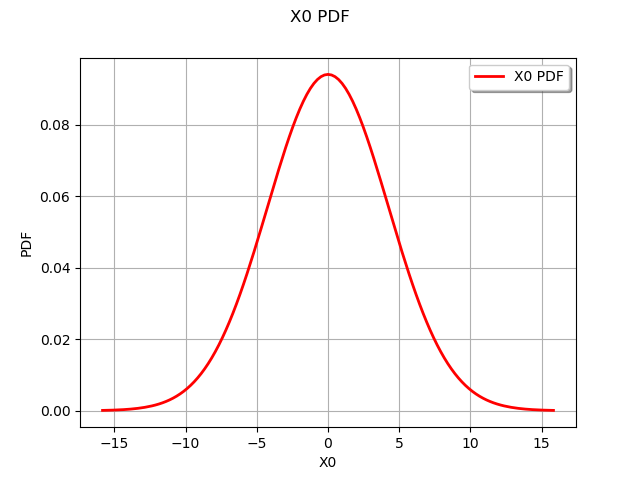

In [8]:
rv.drawPDF()